# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable



In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [8]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [18]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [9]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\gulay\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


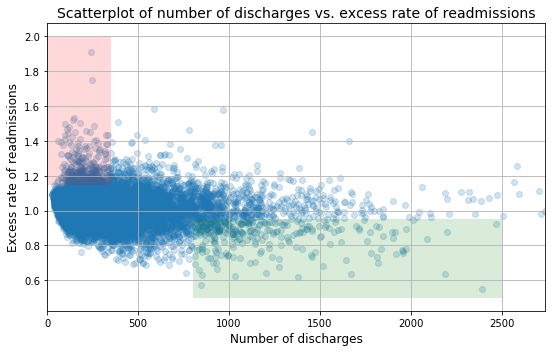

In [12]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div> class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [ ]:
# Your turn

 A. Do you agree with the above analysis and recommendations? Why or why not?
The initial observation sounds correct based on the plot. Most of the data points condense between 0.8 and 1.2 excess readmission rate and less than 1000 number of discharges. Statistics provided above also yields similar results. The correlation between he excess readmission rate and the number of discharge is -0.93% which is really small to say these two variables are correlated. There are other issues needed to discuss before making any conclusions. This result (different between statistics) might not be statistically significant. Right now, there is not much know how the data is collected. Does the data consist of all hospitals or is it just a sample? If it is a sample, is each data point selected randomly or not? The result might be biased migth be due to the fact that smaller hospitals/facilities who have lacking necessary resources were selected. The other issue with conclusion is that there is no information about hospital capacity, the number of discharge might not be a good represantative of the hospital capacity to make the above policy recomendation. 

Below, I will use inferential statistical techniques to make a conclusion about excess readmission rate vs number of discharges. 

In [23]:
print ('The correlation matrix for the excess readmission rate and the number of discharge is')
print (str(np.corrcoef(x,y)))

The correlation matrix for the excess readmission rate and the number of discharge is
[[ 1.         -0.09309554]
 [-0.09309554  1.        ]]


First, I do a standard hypothesis test to test for the population correlation coefficient, ρ with the following null and alternative hypotheses:

Null hypothesis: ρ = 0
Alternative hypothesis: ρ ≠ 0 

Test statistic:  t =r*sqrt((n−2) /(1-r^2))
df = n-2 




In [63]:
rho = -0.093095542875904394
n = len(x)

t_test =rho*np.sqrt((n-2)/(1-rho*rho))
print( 'The test statistics: '+str(t_test))

from scipy import stats
print ('The critical value for the 0.01 significance level:'+ str(stats.t.ppf(1-(0.01), n-2)))

p_value = (1 - stats.t.cdf(np.absolute(t_test), n-2))*2
print ('The p-value for the test statistics: '+str(p_value))

if p_value <= 0.01:
    print ('The null hypothesis that the population correlation coefficient is equal to zero is rejected at a 0.01 level of significance.')
else:
    print ('The null hypothesis that the population correlation coefficient is equal to zero is not rejected at a 0.01 level of significance.')

The test statistics: -10.0234416743
The critical value for the 0.01 significance level:2.32667241041
The p-value for the test statistics: 0.0
The null hypothesis that the population correlation coefficient is equal to zero is rejected at a 0.01 level of significance.


In [57]:
#pearsonr function yields the sample correlation coefficient for the underlying two variables and the p-value for the above test.
from scipy.stats.stats import pearsonr
pearsonr(x, y)

(-0.093095542875904394, 1.5022756426464526e-23)

The above correlation coefficient hypothesis test shows that at 0.01 level of significance the correlation between the excess readmission rate and the number of hospital discharge is different from zero which means the two measures are related to each other.  

The next hypothesis test I want to conduct is to test the mean difference excess readmission rate for the following two groups are equal or not.
1. In hospitals/facilities with number of discharges < 100
2. In hospitals/facilities with number of discharges > 1000

I will use the t-test for two-samples with the pooled variance ( assume the population variances are equal). 

In [61]:
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].dropna()

In [62]:
df.head()

,Number of Discharges,Excess Readmission Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


In [65]:
small_disch = df[df['Number of Discharges']< 100]
len(small_disch)

1188

In [66]:
large_disch = df[df['Number of Discharges']>1000]
len(large_disch)

463

In [67]:
import statsmodels.stats.weightstats as ws

#Null hypothesis: the mean difference between excess readmission ratio in hospitals with small number of discharge and 
#with large number of discharge is equal to zero
#Alternative hypothesis: the difference is not equal to zero
    
    
    
(t_test, p_value) = ws.ztest(small_disch['Excess Readmission Ratio'], large_disch['Excess Readmission Ratio'] , value = 0, alternative='two-sided', usevar='pooled')

print ('The test statistics and p-value for the hypothesis test: the mean difference excess readmission rate between the small and large number of discharge hospitals are equal ')
print("t-test = " + str(t_test) + " and p-value = "+ str(p_value))

if p_value <= 0.01:
    print ('The null hypothesis that the difference in mean excess readmission rate is equal is rejected at a 0.01 level of significance.')
else:
    print ('The null hypothesis that the difference in mean excess readmission rate is equal is not rejected at a 0.01 level of significance.')

The test statistics and p-value for the hypothesis test: the mean difference excess readmission rate between the small and large number of discharge hospitals are equal 
t-test = 10.0606203985 and p-value = 8.24769443323e-24
The null hypothesis that the difference in mean excess readmission rate is equal is rejected at a 0.01 level of significance.


This test and the correlation coefficient test yield the similar result which is the excess readmission rates for the two groups are different at the 0.01 significance level. 

After seeing that the mean difference between two groups is not equal to zero, I want to test if the difference is greater than zero, i.e if the exccess readmission rate in group one (small discharge hospitals ) is larger than that in group two (large discharge hospitals)

In [72]:

#Null hypothesis: the mean difference between excess readmission ratio in hospitals with small number of discharge and 
#with large number of discharge is smaller than and equal to zero
#Alternative hypothesis: the difference is larger than zero
(t_test, p_value) = ws.ztest(small_disch['Excess Readmission Ratio'], large_disch['Excess Readmission Ratio'] , value = 0, alternative='larger', usevar='pooled')

print ('The test statistics and p-value for the hypothesis test: the mean difference excess readmission rate between the small and large number of discharge hospitals are larger than or equal to zero')
print("t-test = " + str(t_test) + " and p-value = "+ str(p_value))

if p_value <= 0.01:
    print ('The null hypothesis that the difference in mean excess readmission rate is smaller than and equal to zero is rejected at a 0.01 level of significance.')
else:
    print ('The null hypothesis that the difference in mean excess readmission rate  is smaller than and equal to zero  is not rejected at a 0.01 level of significance.')

The test statistics and p-value for the hypothesis test: the mean difference excess readmission rate between the small and large number of discharge hospitals are larger than or equal to zero
t-test = 10.0606203985 and p-value = 4.12384721662e-24
The null hypothesis that the difference in mean excess readmission rate is smaller than and equal to zero is rejected at a 0.01 level of significance.


The null hypothesis -the mean difference between excess readmission ratio in hospitals with small number of discharge and 
with large number of discharge is smaller than and equal to zero is rejected. That means the group one has a larger excess readmission rate than the group two. 

Here I conduct different statistical tests which all yield the following results:
- There is a negative correlation between the excess readdmission rate and the number of discharge although the sample correlation is too small.  
- The excess readdmission rate is larger when the number of discharge < 100 than that > 1000. 

These results support the preliminary results except the one with hospital capacity. There is no information about hospital capacity. I believe the number of discharge can not be used to refer the hospital capacity.  
Using a visual plot is 

In [73]:
import plotly.plotly as py
from plotly.graph_objs import *

In [78]:
trace = {"x":[a for a in clean_hospital_read_df['Number of Discharges'][81:-3]],
         "y":list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])}
data = Data([trace])
layout = {"title": "Excess Readmission Ratio", 
          "xaxis": {"title": "Number of Discharges", }, 
          "yaxis": {"title": "Excess Readmission Ratio"}}

fig = Figure(data=data, layout=layout)
py.iplot(fig, filenmae='basic_dot-plot')